<a href="https://colab.research.google.com/github/siddhikharat/my-blog/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#To test hypothesis
from scipy.stats import chi2_contingency

In [ ]:
from google.colab import drive

# Mount Google Drive for data
drive.mount('/content/drive')

# Now we can access files in our Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/A_DS_Practical/Assignment/data.csv'

Mounted at /content/drive


#Data

In [ ]:
#Reading the data
df = pd.read_csv(file_path)
print("Columns list:",df.columns)
df.head()

copy_df=df.copy(deep=True)

Columns list: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


Objecive : This dataset is dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. There is no data on the diagnosis of patients. But other information is available that can help us to make a conclusion about the health of patients and practice regression analysis.

#Data Exploration


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df.describe().T #After data conversion

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
region,1338.0,1.484305,1.104885,0.0000,1.00000,1.000,2.000000,3.00000


Distribution analysis

(Y-Target)
charges : mean > std, Seems near to normal distribution.

Average charges are 13270.42

(x)

standard deviation of feature lesser than their mean, indicates no outliers in the data.

age  : Continuous data, mean > std
Average age of people is 39. minimum age is 18.

bmi : Continuous data, mean > std, Average bmi of people is 30 the obese person having 53 bmi.

childern : Categorical data, Most of people have 0 - 1 childern/dependent.

smoker : Binary categorical data having yes=1 and no=0. larger set of people are non-smoker.

sex : Binary categorical data having F=0 and M=1. male observations are near to equal in the number of oberservation.

region : Categorical data southwest, southeast, northwest and northeast.
Observations are almost equally divided across all region.

We need further investigation to see possible outliers in the data which we can further analyse through graphs and boxplot as it seems many variables have outliers.


In [ ]:
df.isnull().sum() #Missing data check

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.info() #data type, column check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observations:**
* Data have 1338 observations and 15 variables.
* 4 variables are numeric and 2 variables are continuous numeric data types.
* There are no missing values in the data as observations.


# Cleaning and Transformation

In [ ]:
df['smoker'].unique() #data value check

array(['yes', 'no'], dtype=object)

In [ ]:
# Converting the categorical column to numeric
df['smoker_trans'] = df['smoker'].map({'yes': 1, 'no': 0})

# Geting unique category values and their corresponding numeric codes
category_mapping = df[['smoker', 'smoker_trans']].drop_duplicates().sort_values(by='smoker')

# validation
print(category_mapping)

# Renaming column
df.drop(columns=['smoker'], inplace=True)
df.rename(columns={'smoker_trans': 'smoker'}, inplace=True)


  smoker  smoker_trans
1     no             0
0    yes             1


In [ ]:
# Converting the categorical column to numeric
df['sex_trans'] = pd.factorize(df['sex'])[0]

#validation
category_mapping = df[['sex', 'sex_trans']].drop_duplicates().sort_values(by='sex')

# Display the mapping
print(category_mapping)

# Renaming column
df.drop(columns=['sex'], inplace=True)
df.rename(columns={'sex_trans': 'sex'}, inplace=True)

      sex  sex_trans
0  female          0
1    male          1


In [ ]:
# Converting the categorical column to numeric
df['region_trans'] = pd.factorize(df['region'])[0]

#validation
category_mapping = df[['region', 'region_trans']].drop_duplicates().sort_values(by='region')

# Display the mapping
print(category_mapping)

# Renaming column
df.drop(columns=['region'], inplace=True)
df.rename(columns={'region_trans': 'region'}, inplace=True)

      region  region_trans
8  northeast             3
3  northwest             2
1  southeast             1
0  southwest             0


In [ ]:
# descriptive details of categorical data
df[['region', 'charges']].describe().T

,count,mean,std,min,25%,50%,75%,max
region,1338.0,1.484305,1.104885,0.0000,1.00000,1.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df.info() #data type, column check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
 4   smoker    1338 non-null   int64  
 5   sex       1338 non-null   int64  
 6   region    1338 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
transit_df=df.copy(deep=True)

#EDA

##Univariete Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 8), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.45, 0.95)},
        figsize=figsize,)  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    # boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-")  # Add median to the histogram

# Defining fuction to get mean and median of numeric data
def mean_median(x):
  return({"Mean": x.mean(),
          "Median": x.median()})

{'Mean': 30.66339686098655, 'Median': 30.4}

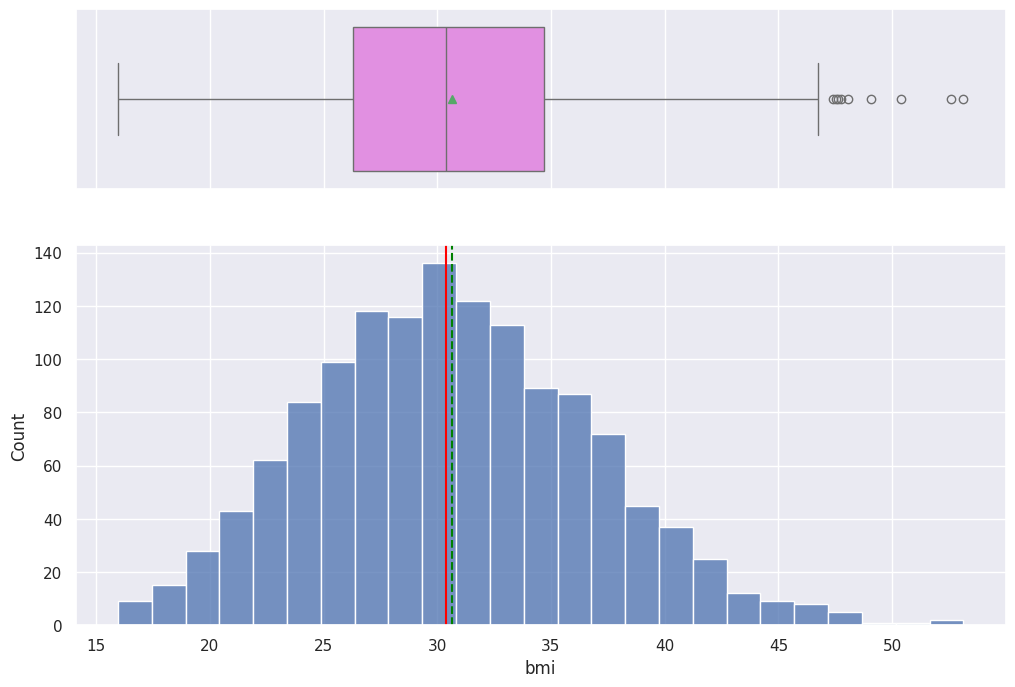

In [ ]:
# List to explore ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
histogram_boxplot(df, "bmi")
mean_median(df.bmi)

**Observations**

AGE:

* The median and mean age is ~39.
* There no are outliers towards lower side and higher side.
* Mean and median are close value.

BMI:

* The median and mean age is ~30.
* There are outliers towards higher side.
* Mean and median are close value
* Distribution is closely normal.






Exploring Categorical data

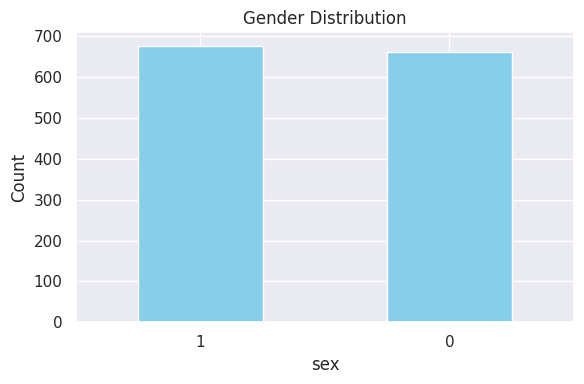

sex
1    676
0    662
Name: count, dtype: int64


In [ ]:

# List to explore ['sex','children', 'smoker', 'region']

# Count occurrences of each gender
gender_counts = df['sex'].value_counts()


# Plot bar plot
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color='skyblue')
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

print(gender_counts)


##Bivariete Analysis

In [ ]:
df=copy_df

### 1.How is the distribution of various properties based on gender?

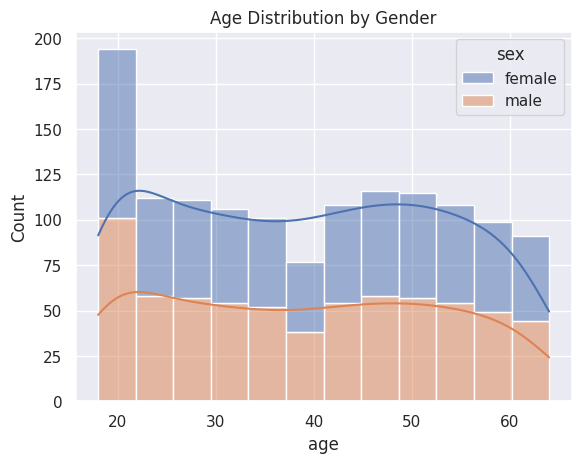

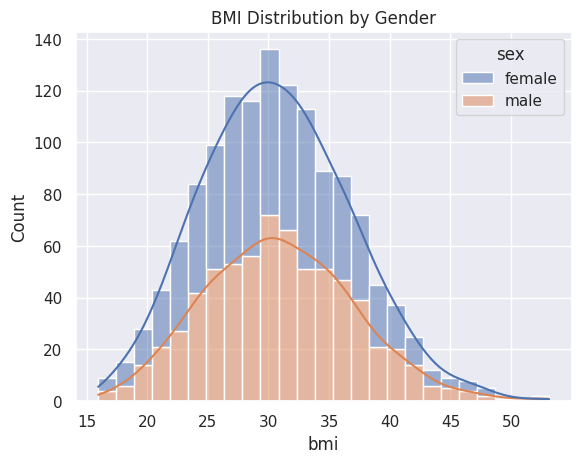

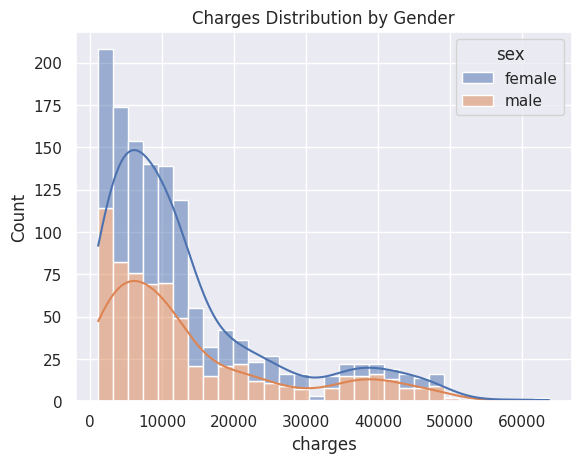

In [ ]:
# Box plot of gender vs charges

# List to explore ['age', 'bmi', 'children', 'smoker', 'region', 'charges']

sns.histplot(data=df, x='age', hue='sex', kde=True, multiple='stack')
# plt.legend(labels=['Male', 'Female'])  # Custom legend labels
plt.title('Age Distribution by Gender')
plt.show()

sns.histplot(data=df, x='bmi', hue='sex', kde=True, multiple='stack')
# plt.legend(labels=['Male', 'Female'])  # Custom legend labels
plt.title('BMI Distribution by Gender')
plt.show()

sns.histplot(data=df, x='charges', hue='sex', kde=True, multiple='stack')
# plt.legend(labels=['Male', 'Female'])  # Custom legend labels
plt.title('Charges Distribution by Gender')
plt.show()

**Obeservation on Continious data**

The BMI is close to normaly distributed with Gender.
whereas charges are right skewed in distribution for both male and female.
and age are flat platue in in distribution for both male and female.

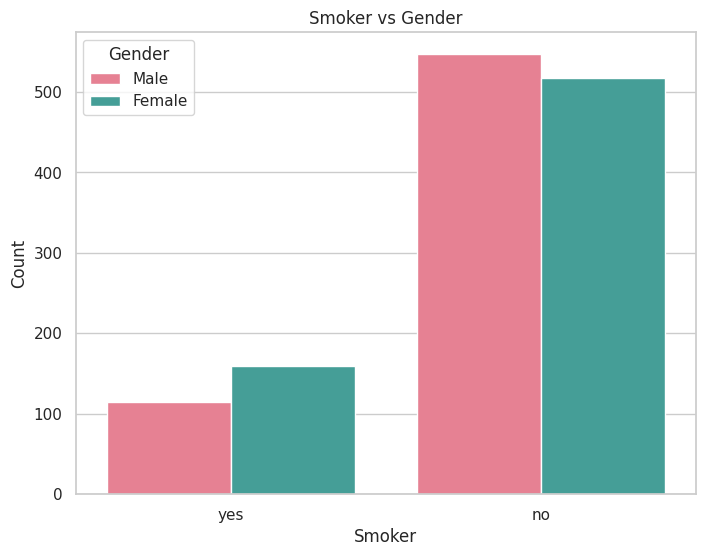

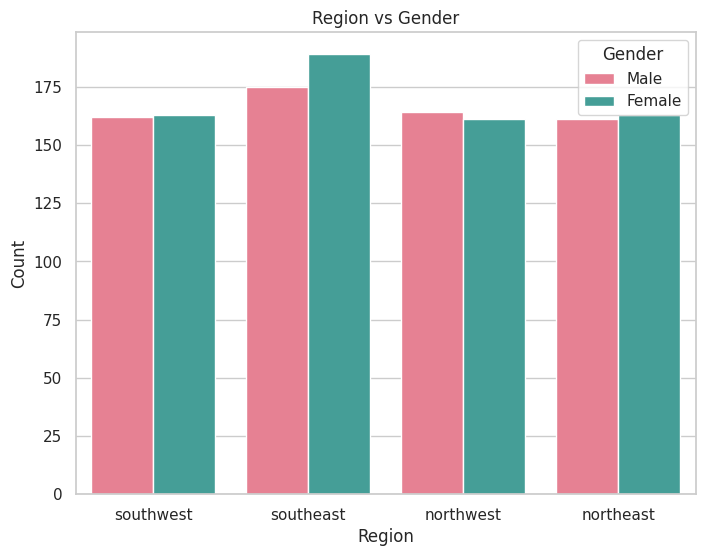

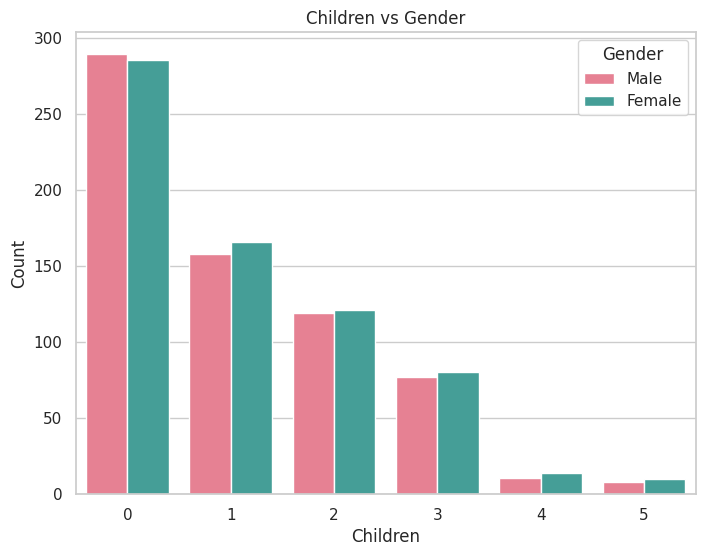

In [ ]:
sns.set(style="whitegrid")

# Plot a grouped bar chart for smoker vs gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoker', hue='sex', palette='husl')
plt.title('Smoker vs Gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

# Plot a grouped bar chart for smoker vs gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='region', hue='sex', palette='husl')
plt.title('Region vs Gender')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

# Plot a grouped bar chart for smoker vs gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='children', hue='sex', palette='husl')
plt.title('Children vs Gender')
plt.xlabel('Children')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

**Obeservation on Categorical data**

The Gender both male and female are following close to equal count in
region, childern, smoking.

###2.Perform hypothesis testing to check whether having children more children results in the fact that people smoke less?

In [ ]:
df=transit_df.copy(deep=True)

In [ ]:
#Creating pivot for children vs smoker
contingency_table = pd.crosstab(df['children'], df['smoker'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 6.887719904947631
P-value: 0.22912555089568779


Chi-square test of independence tells if there is significant association between two variables.

Hypothesis H0 - there is no association in childeren and smoker. meaning smoking does not depend on how many dependent are there.

The chi-square statistic is 6.8877.
The p-value associated with this statistic is approximately 0.2291.
Since the p-value (0.2291) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis.

 the data does not provide sufficient evidence to claim that smoking behavior is dependent on the number of dependents/childerens.




### 4.What can you say about the difference in distribution of charges for smokers and non smokers? (BiVariete analysis)

In [ ]:
df=copy_df

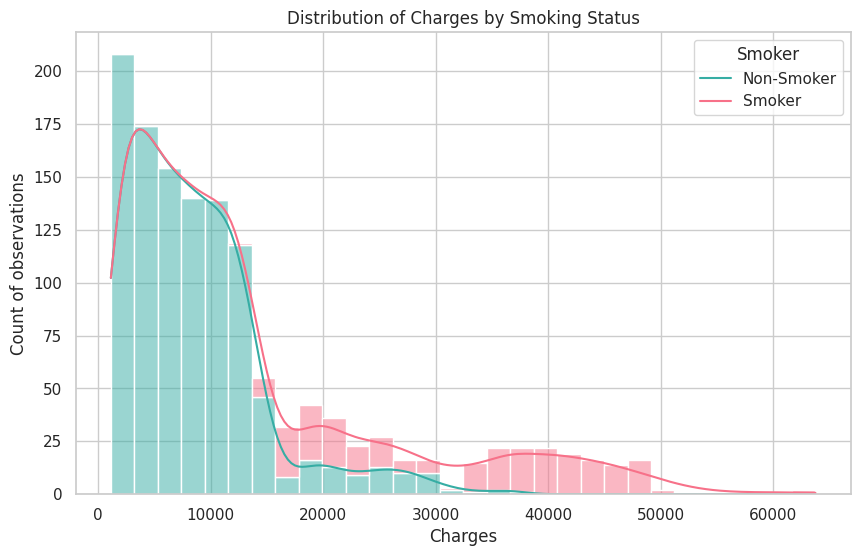

In [ ]:

#Continuous vs categorical data analysis

# Set style for seaborn
sns.set(style="whitegrid")

# Plot stacked bar chart for charges by smoker status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges', hue='smoker', bins=30, multiple='stack', palette='husl', kde=True)
plt.title('Distribution of Charges by Smoking Status')
plt.xlabel('Charges')
plt.ylabel('Count of observations')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()

* Charges for Non-Smoker observed under ~30000 and distribution is right skewed meaning greater count have lesser charges like 0 to ~10000.

* Charges for Smoker observed spread across ~50000, smoking is increasing the chances of higher charges spent on insurance.





###5.How is BMI affecting the distribution of charges?

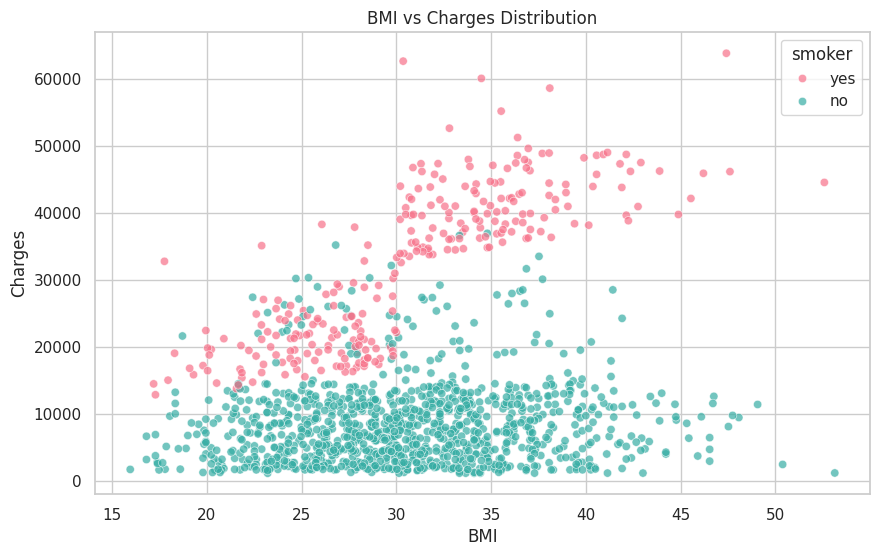

In [ ]:
#Continuous vs Continuous analysis.

sns.set(style="whitegrid")

# Plot scatter plot for BMI vs charges distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', palette='husl', alpha=0.7, legend=True)
plt.title('BMI vs Charges Distribution')
plt.xlabel('BMI')
plt.ylabel('Charges')
#plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()




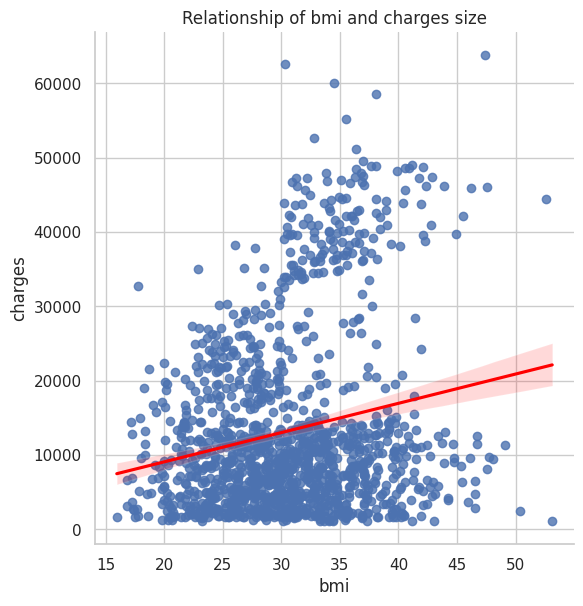

In [ ]:
#Scatterplot
sns.lmplot(x="bmi", y="charges", data=df, height = 6, line_kws={'color': 'red'})
plt.title("Relationship of bmi and charges size")
plt.show()

* Increase in BMI seems increase in Charges.

* Above the 25-30 BMI there are steap increase in charges oberved.



###6.Plot the region wise distribution of charges based on other variables and draw the insights.


In [ ]:
df=copy_df

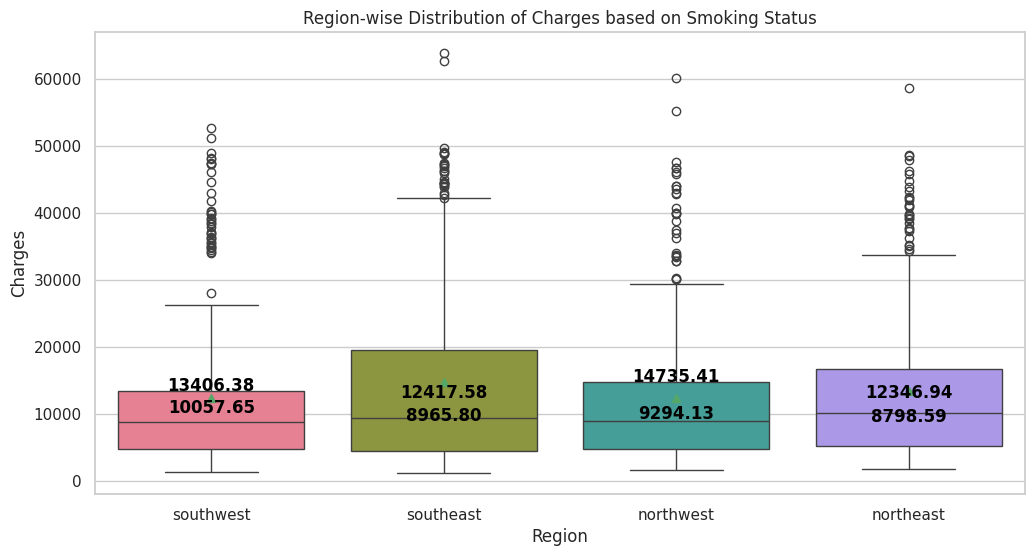

In [ ]:
# Categorical vs Continuous analysis-(box, bar)

sns.set(style="whitegrid")

# Ploting box plot for region-wise distribution of charges based on another variable
plt.figure(figsize=(12, 6))
ax=sns.boxplot(data=df, x='region', y='charges', palette='husl', legend=True,showmeans=True)
medians = df.groupby(['region'])['charges'].median().values
means = df.groupby(['region'])['charges'].mean().values
for i in range(len(medians)):
    ax.text(i, medians[i], f'{medians[i]:.2f}', horizontalalignment='center', color='black', weight='semibold')
    ax.text(i, means[i], f'{means[i]:.2f}', horizontalalignment='center', color='black', weight='semibold')
plt.title('Region-wise Distribution of Charges based on Smoking Status')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()




** Observations**

* Box plot shows Spread, IQR and Outliers of the data.

* Region wise median for charges are close in values.there is relatively uniform central tendency in the distribution of charges across those regions.

* For all regions there are upper side outliers or extreme value oberservations.

* South east region's spread in the charges value is greater in all.
Southwest and northwest are almost equal in speards.





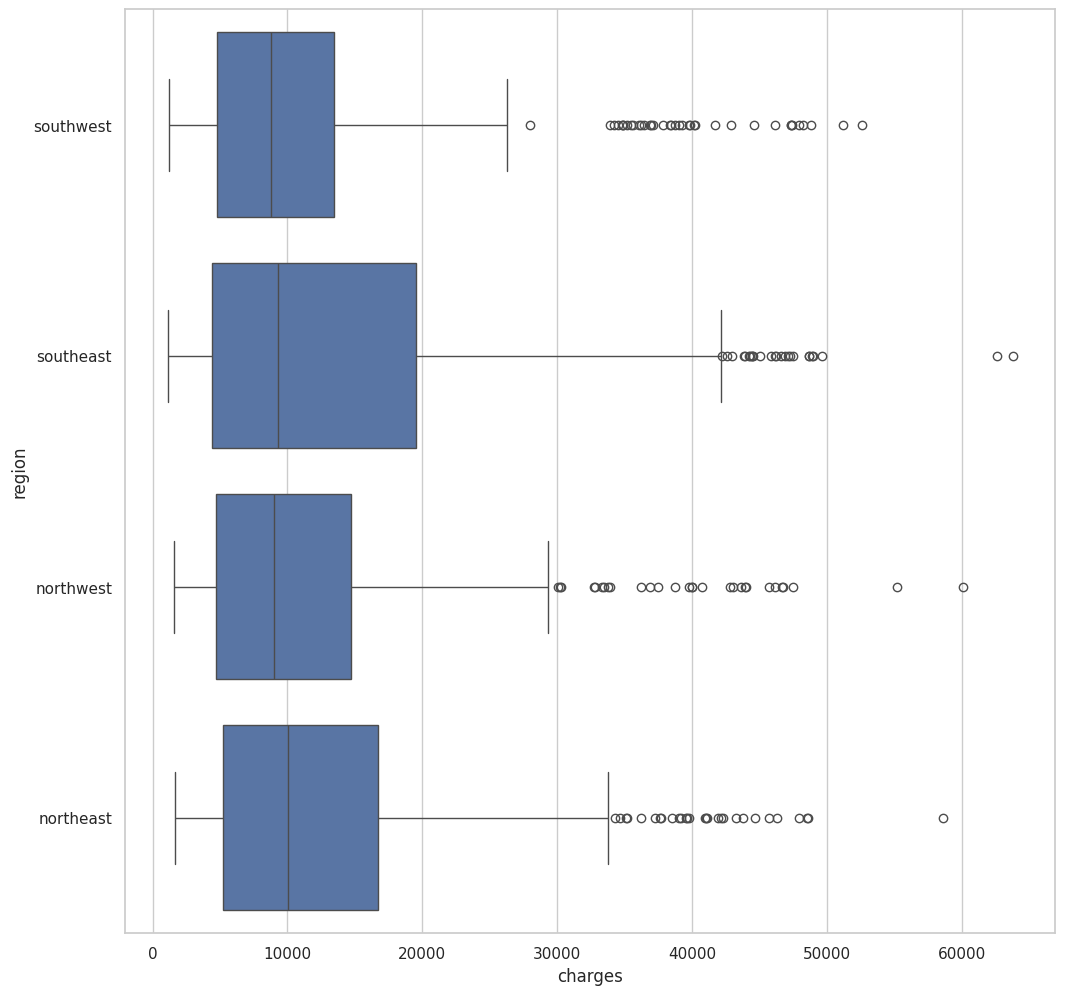

In [ ]:
plt.figure(figsize=(12, 12))
sns.boxplot(y="region", x="charges", data=df)
plt.show()

##Multivariet Analysis

###3.Which variable do you think effect the charges the most and why (prove it).


In [ ]:
df=transit_df

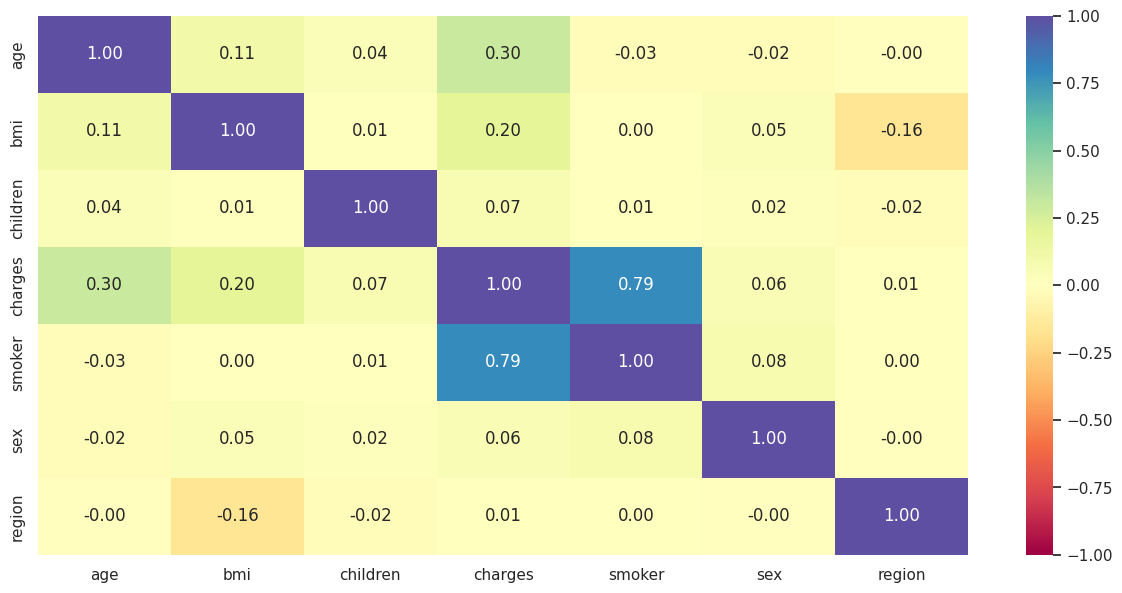

,age,bmi,children,charges,smoker,sex,region
age,1.000000,0.109272,0.042469,0.299008,-0.025019,-0.020856,-0.002127
bmi,0.109272,1.000000,0.012759,0.198341,0.003750,0.046371,-0.157566
children,0.042469,0.012759,1.000000,0.067998,0.007673,0.017163,-0.016569
charges,0.299008,0.198341,0.067998,1.000000,0.787251,0.057292,0.006208
smoker,-0.025019,0.003750,0.007673,0.787251,1.000000,0.076185,0.002181
sex,-0.020856,0.046371,0.017163,0.057292,0.076185,1.000000,-0.004588
region,-0.002127,-0.157566,-0.016569,0.006208,0.002181,-0.004588,1.000000


In [ ]:
# correlation heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
) #coolwarm Spectral
plt.show()

# Correlation mateix
df.corr()


**Observations:**  

**age and bmi** is highly positively correlated with **charges**, which means that as age and bmi increases, charges tends to increase.

**children,charges, smoker,sex,region** is also positively correlated with **charges** but moderate relation.



## Outliers

In [ ]:
df=transit_df

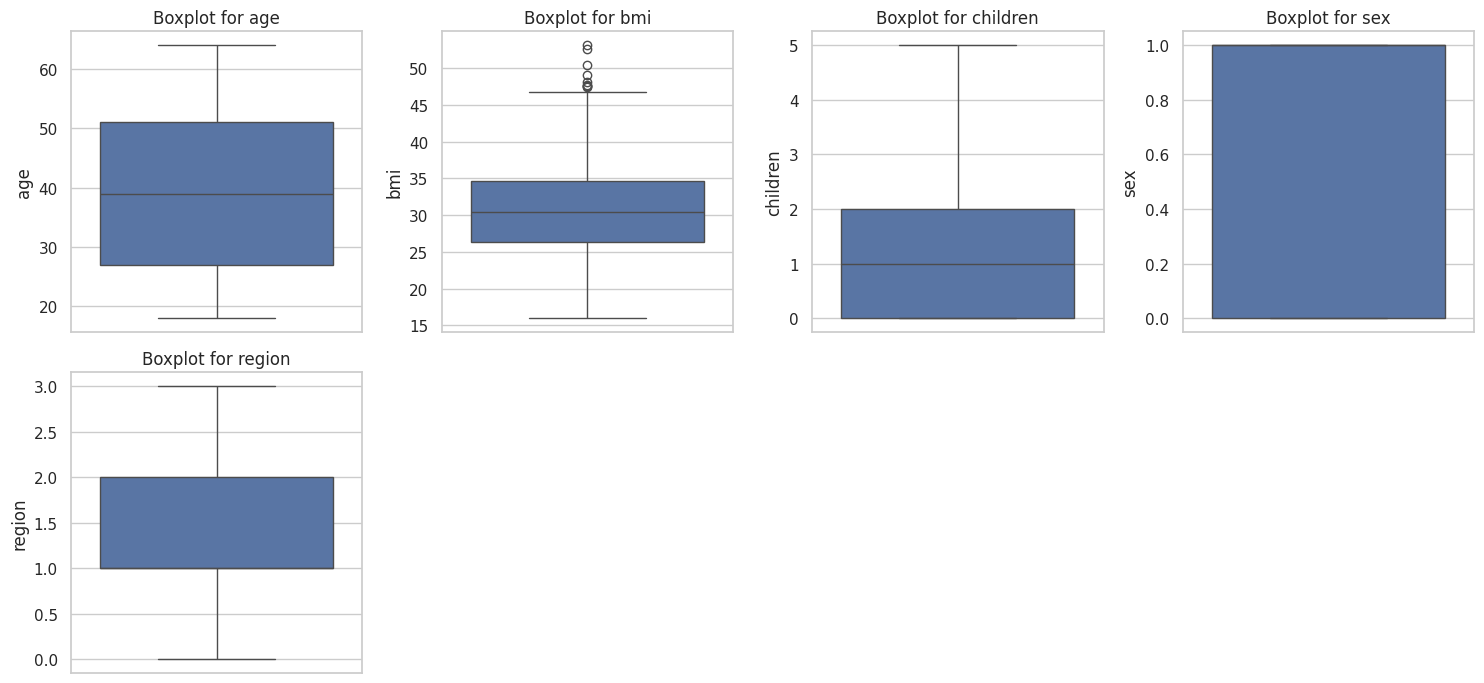

In [ ]:

fig, ax = plt.subplots(2,4, figsize = (15,7))
ax = ax.flatten()
for i,cols in enumerate(['age', 'bmi', 'children','sex', 'region']):
    sns.boxplot(y = cols, ax = ax[i], data = df)
    ax[i].set_title('Boxplot for {}'.format(cols))
for k in range(i+1,len(ax)):
    ax[k].axis('off')
plt.tight_layout()
plt.show()

BMI requires the outlier treatment.

In [ ]:
# Replacig the Outliers for 10 percentile for lowerbounds and 90th percentile with Upper Bound

def outliers3(df,columnname):
    Q3 = df[columnname].quantile(0.75)
    Q1 = df[columnname].quantile(0.25)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 *IQR
#     print('values for {}:'.format(columnname),IQR,LB,UB)
    df.loc[df[columnname] < LB, columnname] = df[columnname].quantile(0.10)
    df.loc[df[columnname] > UB, columnname] = df[columnname].quantile(0.90)

outliers3(df,'bmi')

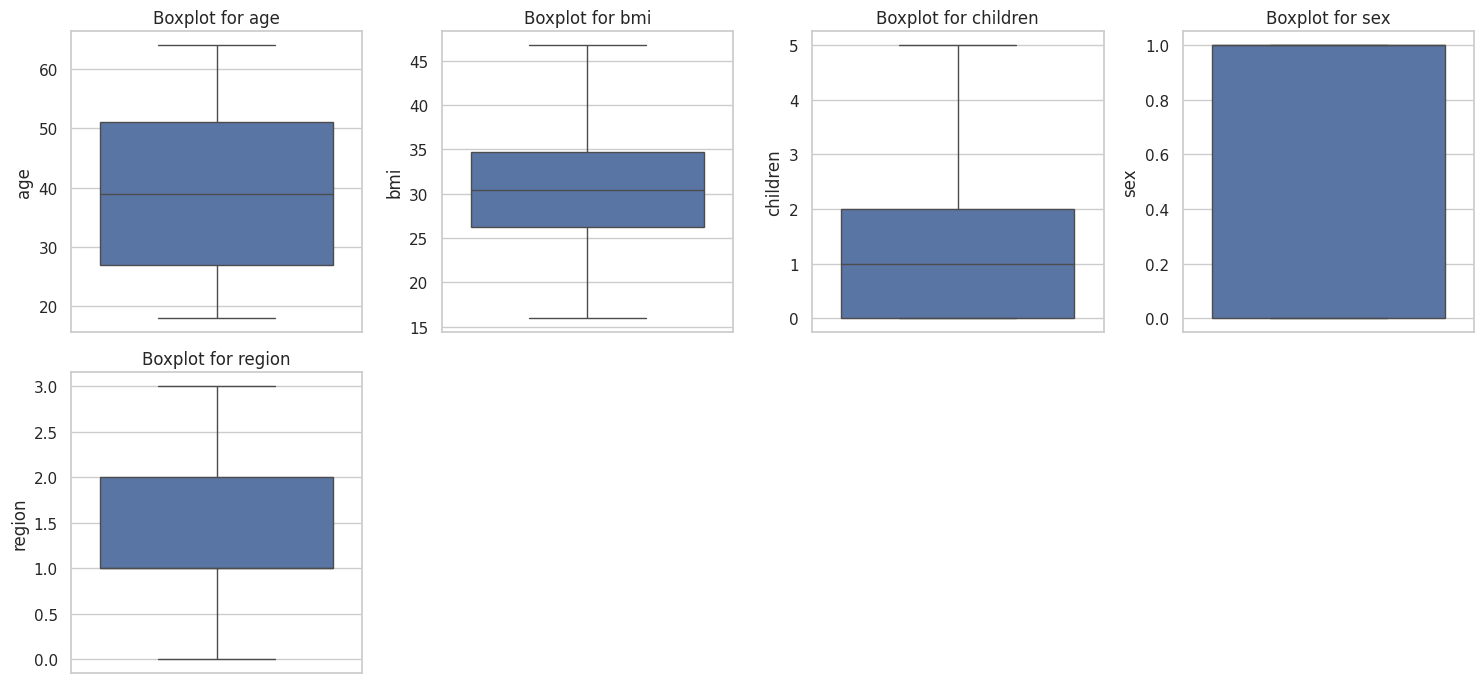

In [ ]:
fig, ax = plt.subplots(2,4, figsize = (15,7))
ax = ax.flatten()
for i,cols in enumerate(['age', 'bmi', 'children','sex', 'region']):
    sns.boxplot(y = cols, ax = ax[i], data = df)
    ax[i].set_title('Boxplot for {}'.format(cols))
for k in range(i+1,len(ax)):
    ax[k].axis('off')
plt.tight_layout()
plt.show()

##Modelling


### Make a well performing model predicting the charges based on the various other variables.

Here using linear regression model, predicting the charges. We encodeed all categorical features.

We will split the data into training data and testing data. Where training data have 70% observations and 30% testing observatins. We will build a Linear Regression model using the training data and then check it's performance on test data.

In [ ]:
# Seprating target variables from data

feature_columns = df.columns.difference( ['charges'])
feature_columns

Index(['age', 'bmi', 'children', 'region', 'sex', 'smoker'], dtype='object')

In [ ]:
# Spliting data into training and testing - 70% data as training set and 30% as testing set

x_train, x_test, y_train, y_test = train_test_split(df[feature_columns],
                                                  df['charges'],
                                                  test_size = 0.3,
                                                  random_state = 123)

print("Observations in train data 70% =", x_train.shape[0], x_train.columns)
print("Observations in test data 30% =", x_test.shape[0],x_test.columns )

Observations in train data 70% = 936 Index(['age', 'bmi', 'children', 'region', 'sex', 'smoker'], dtype='object')
Observations in test data 30% = 402 Index(['age', 'bmi', 'children', 'region', 'sex', 'smoker'], dtype='object')


###Model1

In [ ]:
## Building the model with train set.

from sklearn.linear_model import LinearRegression

# regression model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

###Model2


In [ ]:
import statsmodels.api as sm

# Adding constant term to the independent variables (required for statsmodels)
# Default constant would be 1.0

X = sm.add_constant(x_train)
print(X, type(X))

# Fitting the OLS model
model_ols = sm.OLS(y_train, X).fit()



      const  age     bmi  children  region  sex  smoker
300     1.0   36  27.550         3       3    1       0
904     1.0   60  35.100         0       0    0       0
670     1.0   30  31.570         3       1    1       0
617     1.0   49  25.600         2       0    1       1
373     1.0   26  32.900         2       0    1       1
...     ...  ...     ...       ...     ...  ...     ...
1238    1.0   37  22.705         3       3    1       0
1147    1.0   20  31.920         0       2    0       0
106     1.0   19  28.400         1       0    0       0
1041    1.0   18  23.085         0       3    1       0
1122    1.0   53  36.860         3       2    0       1

[936 rows x 7 columns] <class 'pandas.core.frame.DataFrame'>


### Model3

In [ ]:
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xg_model = xgb.XGBRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("best_params : ",best_params)


# Train the model with the best hyperparameters
xg_model = xgb.XGBRegressor(**best_params)
xg_model.fit(x_train, y_train)

best_params :  {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Summary
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     453.5
Date:                Tue, 14 May 2024   Prob (F-statistic):          5.67e-272
Time:                        04:47:54   Log-Likelihood:                -9492.5
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     929   BIC:                         1.903e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.313e+04   1236.216    -10.623      0.0

**Report Reading**

1)R-sqaure,adj-R-square are less varying so model is good.
•	Conclusion – Adjusted R2 will increase if X (Set of features) have effect on Y(Target)
and it will decrease if there is Irrelevant feature in your X set.
So if its low then revisit your feature engineering step! Here it is not required.

2)Prob (F-statistic):  454.6
This is P-value, Null hypothesis -> all coefficient (beeta) are 0.
here P value less than 2.38**e-272** hence reject the null hypohesis.
suggesting that at least one of the independent variables has a non-zero effect on the dependent variable!

3)AIC -> area information crieria , for single model its not useful,
only if you have trained two models then you can compare AIC to conclude which model is better.
Lower the AIC is better!

4)The P value for all is less than 2.38**e-272** hence -> all had significant impact on Charges!

5) Durbin-Watson: 1.924

Which is less than 3,
means there is no auto correlation with Charges ! its good!

6) Except Gender all have positive relationship. according to coefficient values.

In [ ]:
#Model 1 & 2
coefficients = model_ols.params[1:]  # Exclude the intercept term
intercept = model_ols.params[0]  # Intercept term

print("Intercept model 1:", linreg.intercept_)
print("Intercept model 2:", intercept)

coef_df = pd.DataFrame({'Feature': x_train.columns, 'Coefficient_model1': linreg.coef_,'Coefficient_model2': coefficients})
coef_df.head()

Intercept model 1: -13131.839354593736
Intercept model 2: -13131.839354593729


,Feature,Coefficient_model1,Coefficient_model2
age,age,258.010521,258.010521
bmi,bmi,343.819658,343.819658
children,children,479.316687,479.316687
region,region,388.434172,388.434172
sex,sex,-89.425006,-89.425006


In [ ]:
importances = xg_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': importances})
#Sorting by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

    Feature  Importance
5    smoker    0.831311
1       bmi    0.091039
0       age    0.045002
2  children    0.015959
3    region    0.010876
4       sex    0.005813


**Observation**

* Model 1 and 2

Coefficients ->

The coefficients for each feature (age, BMI, children, region, sex) in both models are identical. This means that both models assign the same magnitude of influence to each feature in predicting charges.

Intercept ->
As the intercept values are nearly identical for both models, it suggests that they predict similar baseline charges for individuals when all other features are zero.
The intercept represents the predicted value of the dependent variable (charges) when all independent variables (features) are equal to zero.


* Model3

1. Smoker with 0.94 is by far the most important feature in predicting medical charges according to the XGBoost model. A high importance score of 0.948061 suggests that whether an individual is a smoker or not has a significant impact on their medical charges.

2. BMI (Body Mass Index) is the second most important feature, although its importance is significantly lower compared to smoker status.
A smaller importance score of 0.019408 suggests that BMI has a relatively weaker but still notable impact on medical charges.

3. Sex (gender) has the lowest importance score of 0.004476, indicating the least impact on medical charges among the features considered.
This suggests that gender may not significantly influence medical costs compared to other factors such as smoking status, BMI, and age.



##Prediction on train-test data



In [ ]:
# prediction sklearn linear reg
y_pred_l = linreg.predict(x_test)

In [ ]:
# prediction xgboost
y_pred_x = xg_model.predict(x_test)

In [ ]:
# prediction OLS
X_test_with_const = sm.add_constant(x_test)
y_pred_o= model_ols.predict(X_test_with_const).values


In [ ]:
test_predictions_df = pd.DataFrame({
    'Actual': y_test,              # True target values
    'LR_Prediction': y_pred_l,  # Predictions from sklearn Linear Regression
    'XGBoost_Prediction': y_pred_x,    # Predictions from XGBoost
    'OLS_Prediction': y_pred_o        # Predictions from OLS
})

test_predictions_df.head()


,Actual,LR_Prediction,XGBoost_Prediction,OLS_Prediction
650,9800.88820,15531.966721,10660.675781,15531.966721
319,4667.60765,9516.198445,7391.443359,9516.198445
314,34838.87300,28334.130309,36353.316406,28334.130309
150,5125.21570,5361.657249,7041.118652,5361.657249
336,12142.57860,11497.719059,15128.972656,11497.719059


Above first five observatiobs of result shows actual and predicted values are close in some observations and higher difference in some cases. It seems model has good prediction results but we have investigate this further to unserstand overall result.

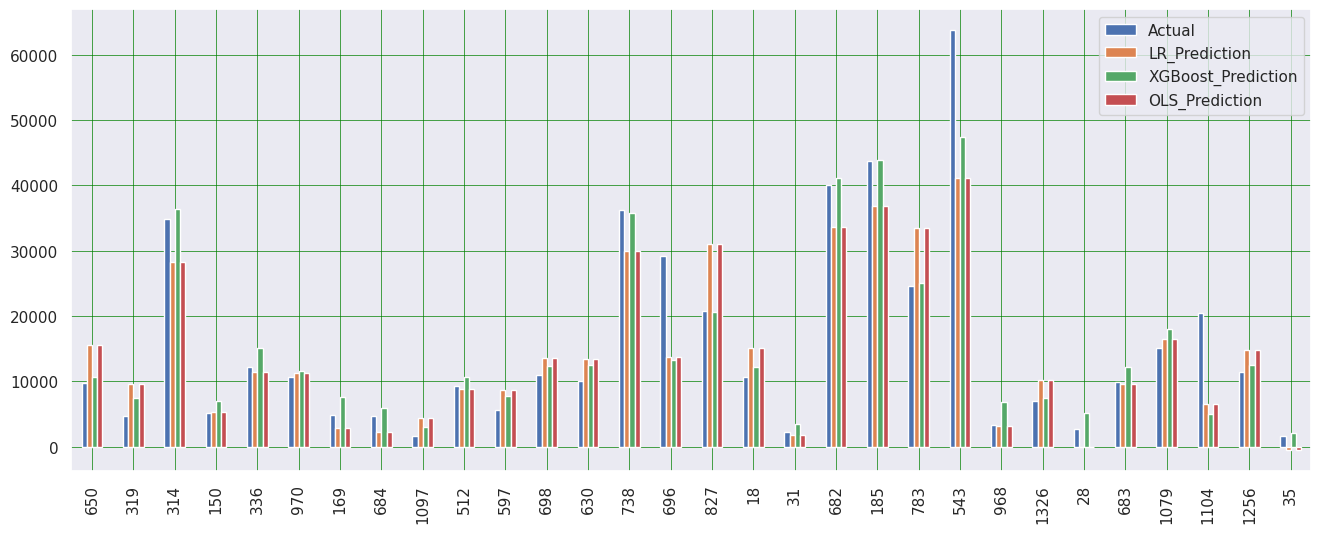

In [ ]:
# Bar graph

df_ap = test_predictions_df.head(30)
df_ap.plot(kind="bar", figsize=(16, 6))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

By using sample of 30, we can see that OLS and linear regression model are predicting nearly same, as intercept and coeffiecient are in nearly same.

XGboost model seen close to actuals compare to linear regression in some cases.

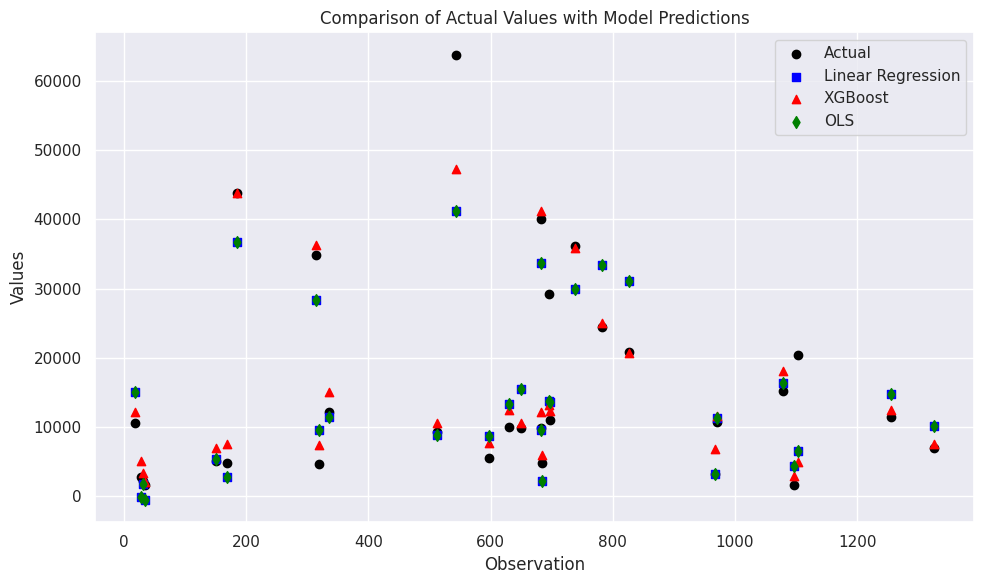

In [ ]:
plt.figure(figsize=(10, 6))

# Plot true values
plt.scatter(df_ap.index, df_ap['Actual'], label='Actual', color='black', marker='o')

# Plot predictions from different models without lines
plt.scatter(df_ap.index, df_ap['LR_Prediction'], label='Linear Regression', color='blue', marker='s')
plt.scatter(df_ap.index, df_ap['XGBoost_Prediction'], label='XGBoost', color='red', marker='^')
plt.scatter(df_ap.index, df_ap['OLS_Prediction'], label='OLS', color='green', marker='d')

# Set labels and title
plt.xlabel('Observation')
plt.ylabel('Values')
plt.title('Comparison of Actual Values with Model Predictions')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

##Linear Regression Assumption Testing

In order to make statistical inferences from a linear regression model, we will ensure that the assumptions of linear regression are satisfied.We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

In [ ]:
#Multi colinearity test

from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

# Checking VIF
checking_vif(x_train)

,feature,VIF
0,age,7.800587
1,bmi,9.533366
2,children,1.766933
3,region,2.624943
4,sex,2.015646
5,smoker,1.250314


In [ ]:
 ['age', 'bmi', 'children', 'charges', 'smoker', 'sex', 'region'], dtype='object'

Index(['age', 'bmi', 'children', 'charges', 'smoker', 'sex', 'region'], dtype='object')

VIF value for all the variables are less than 5 for 'children', 'smoker', 'sex', 'region', so there is almost no multicollinearity or low multicollinearity and the assumption is satisfied.

VIF value for all the variables are less than 10 for 'age', 'bmi' so there is moderate to low multicollinearity.

VIF value above 10 indicates high multicollinearity.


In [ ]:
#Assumptions 2 and 3 - Test for Linearity and Indepedence

# let us create a dataframe with actual, fitted and residual values
residuals_lr = y_test - y_pred_l
residuals_xgb = y_test - y_pred_x
residuals_ols = y_test - y_pred_o

# Add residuals to the DataFrame
test_predictions_df['LR_Residuals'] = residuals_lr
test_predictions_df['XGBoost_Residuals'] = residuals_xgb
test_predictions_df['OLS_Residuals'] = residuals_ols



test_predictions_df.head()

,Actual,LR_Prediction,XGBoost_Prediction,OLS_Prediction,LR_Residuals,XGBoost_Residuals,OLS_Residuals
650,9800.88820,15531.966721,10660.675781,15531.966721,-5731.078521,-859.787581,-5731.078521
319,4667.60765,9516.198445,7391.443359,9516.198445,-4848.590795,-2723.835709,-4848.590795
314,34838.87300,28334.130309,36353.316406,28334.130309,6504.742691,-1514.443406,6504.742691
150,5125.21570,5361.657249,7041.118652,5361.657249,-236.441549,-1915.902952,-236.441549
336,12142.57860,11497.719059,15128.972656,11497.719059,644.859541,-2986.394056,644.859541


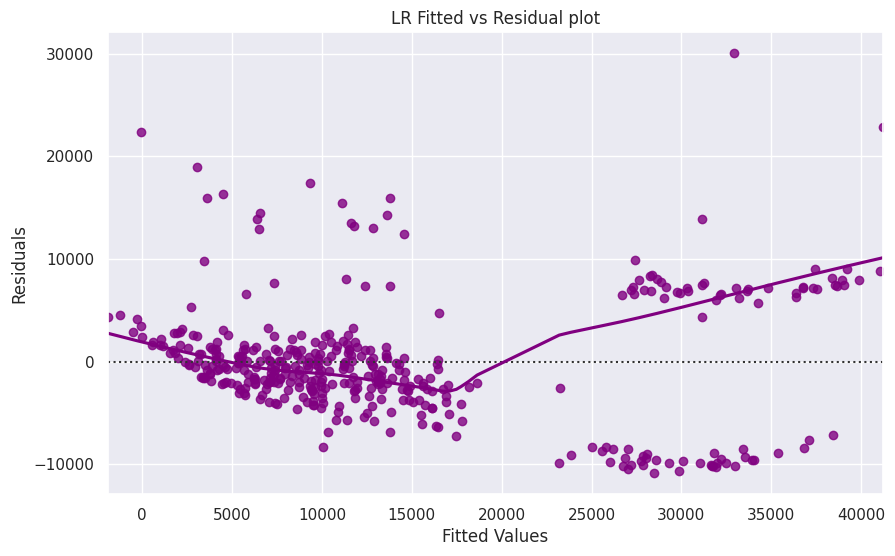

In [ ]:
# fitted values vs residuals plot
plt.subplots(figsize=(10, 6))
sns.residplot(
    data=test_predictions_df, x="LR_Prediction", y="LR_Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("LR Fitted vs Residual plot")
plt.show()


The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) for Linear Regression.

If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

We see there is no any significant pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

Columns
age: age of primary beneficiary
sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
children: Number of children covered by health insurance / Number of dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
charges: Individual medical costs billed by health insurance


apply Linear regression to predict charges. validate all the Linear regression assumptions.

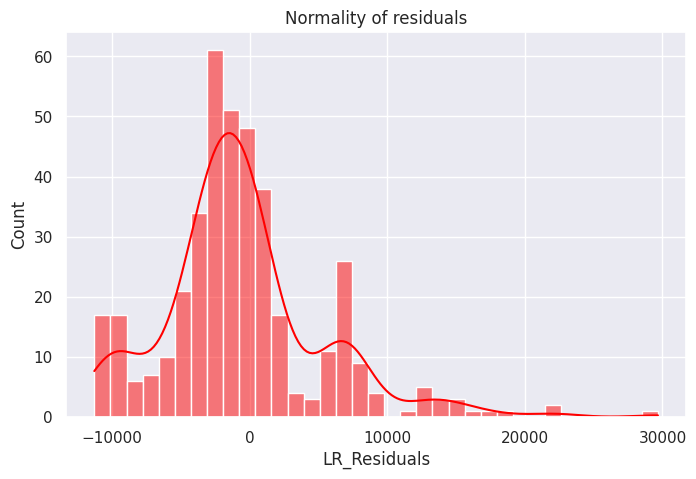

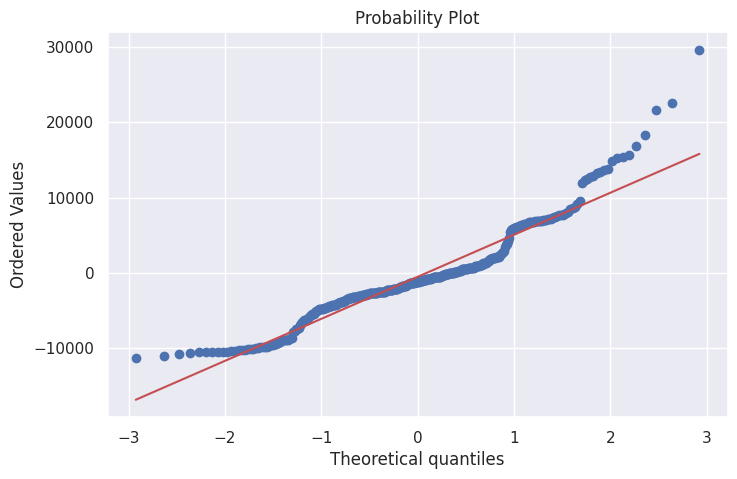

In [ ]:
#Normality of residuals: Checking if residuals are normally distributed

# Histogram of residuals
plt.subplots(figsize=(8, 5))
sns.histplot(data=test_predictions_df, x="LR_Residuals", kde=True, color = 'red')
plt.title("Normality of residuals")
plt.show()

# Q-Q plot
import pylab
import scipy.stats as stats
plt.subplots(figsize=(8, 5))
stats.probplot(test_predictions_df.LR_Residuals, dist="norm", plot=pylab)
plt.show()

The QQ plot shows residuals more or less follow a straight line except for the up tails.

The Distribution of residual is right skewed to moderately normal.

If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

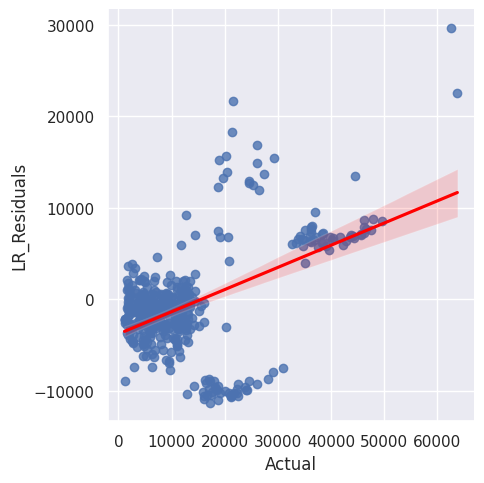

In [ ]:
#Homoscedastic

sns.lmplot(x ="Actual",
y = "LR_Residuals", data = test_predictions_df, line_kws = {'color': 'red'})



Constant Error Variance, i.e, the variance of the error term is same across all values of the independent variable. It can be easily checked by making a scatter plot between Residual and Fitted Values. If there is no trend then the variance of error term is constant.

## Model performance evaluation

We will check the model performance using different metrics functions defined in sklearn for **RMSE**, **MAE,** , **MAPE**, **$R^2$** and  **Adj $R^2$** .

creating a function which will print all the above metrics in one go.

In [ ]:

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):

    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Model Performance on training data\n")
linreg_train_perf = model_performance_regression(
    linreg, x_train, y_train
)
linreg_train_perf

Model Performance on training data



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6134.423661,4273.896408,0.745938,0.744297,44.353551


In [ ]:
# checking model performance on test set (seen 30% data)
print("Model Performance on testing data\n")
linreg_test_perf = model_performance_regression(
    linreg, x_test, y_test
)
linreg_test_perf

Model Performance on testing data



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5850.916523,4219.719468,0.760372,0.756732,44.561028


In [ ]:
print(f"Linear Regression-Training set score: {linreg.score(x_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {linreg.score(x_test, y_test):.2f}")

For Linear Regression Model on Train- Test data
MSE	MAE	R-squared	Adj. R-squared and MAPE are not variying in large difference. it is a sign of controlled variance and bias.


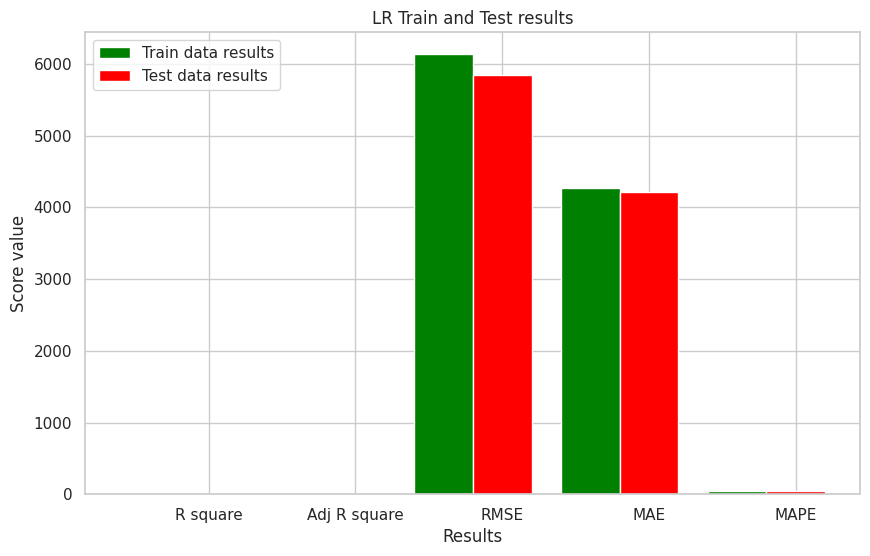

In [ ]:
plt.subplots(figsize=(10, 6))

Results = ["R square", "Adj R square","RMSE", "MAE", "MAPE"]
Train_data_result = [0.745938,	0.744297, 6134.42366, 4273.896408,	44.353551]
Test_data_result  = [0.760372, 0.756732, 5850.916523,	4219.719468,	44.561028]

index = np.arange(5)
width = 0.4
plt.bar(Results, Train_data_result , width, color = 'green', label = 'Train data results')
plt.bar(index+width, Test_data_result , width, color = 'red', label = 'Test data results')
plt.title("LR Train and Test results")

plt.xlabel("Results")
plt.ylabel("Score value")
plt.xticks(index+width, Results)

plt.legend(loc = 'upper left')
plt.show()

In [ ]:

# checking model performance on train set (seen 70% data)
print("Model Performance on training data\n")
xg_train_perf = model_performance_regression(
    xg_model, x_train, y_train
)
print(xg_train_perf.head())

# checking model performance on test set (seen 30% data)
print("Model Performance on testing data\n")
xg_test_perf = model_performance_regression(
    xg_model, x_test, y_test
)
xg_test_perf

Model Performance on training data

         RMSE          MAE  R-squared  Adj. R-squared       MAPE
0  4256.32825  2387.683777    0.87769          0.8769  29.260011
Model Performance on testing data



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4050.215278,2384.220138,0.885173,0.883428,29.682678


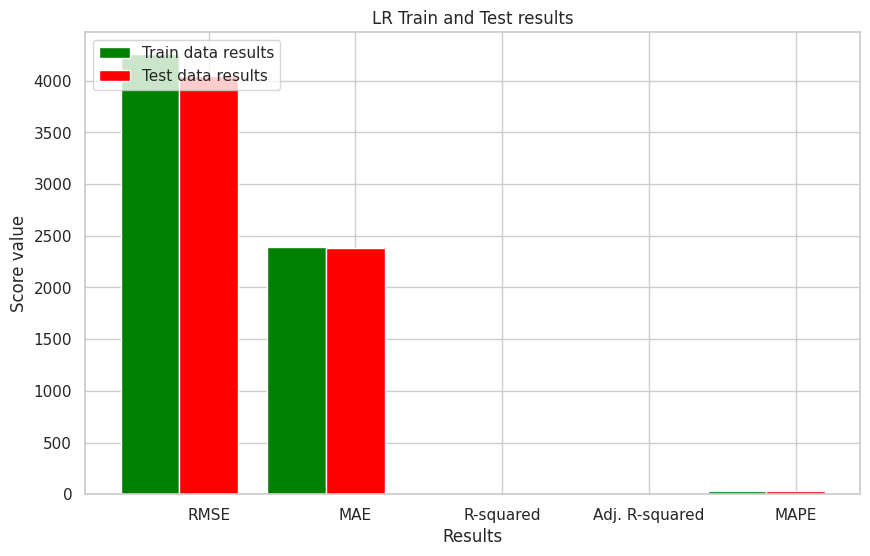

In [ ]:
plt.subplots(figsize=(10, 6))

Results = ["RMSE",	"MAE",	"R-squared",	"Adj. R-squared",	"MAPE"]
Train_data_result = [4256.32825,  2387.683777,    0.87769,          0.8769,  29.260011]
Test_data_result  = [4050.215278,	2384.220138,	0.885173,	0.883428,	29.682678]

index = np.arange(5)
width = 0.4
plt.bar(Results, Train_data_result , width, color = 'green', label = 'Train data results')
plt.bar(index+width, Test_data_result , width, color = 'red', label = 'Test data results')
plt.title("LR Train and Test results")

plt.xlabel("Results")
plt.ylabel("Score value")
plt.xticks(index+width, Results)

plt.legend(loc = 'upper left')
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred_train = xg_model.predict(x_train)
y_pred = xg_model.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - x_train.shape[1] - 1))
train_mape = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

# Calculate metrics for test data
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1))
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print results
print("XGBoost Model Results:")
print("Train Data:")
print("RMSE:", train_rmse)
print("MAE:", train_mae)
print("R-squared:", train_r2)
print("Adj. R-squared:", train_adj_r2)
print("MAPE:", train_mape)
print("___________")
print("Test Data:")
print("RMSE:", test_rmse)
print("MAE:", test_mae)
print("R-squared:", test_r2)
print("Adj. R-squared:", test_adj_r2)
print("MAPE:", test_mape)


XGBoost Model Results:
Train Data:
RMSE: 4256.328250120201
MAE: 2387.6837774953674
R-squared: 0.8776896800238643
Adj. R-squared: 0.8768997317785932
MAPE: 29.26001132592496
___________
Test Data:
RMSE: 4050.2152776714684
MAE: 2384.220137851018
R-squared: 0.8851725433938569
Adj. R-squared: 0.8834283288631306
MAPE: 29.68267807543806


**Recommendation & Model Performance Report: XGBoost vs. Linear Regression**

**XGBoost Model Results:**
Train Data:
RMSE: 4256.328250120201
MAE: 2387.6837774953674
R-squared: 0.8776896800238643
Adj. R-squared: 0.8768997317785932
MAPE: 29.26001132592496%
___________
Test Data:
RMSE: 4050.2152776714684
MAE: 2384.220137851018
R-squared: 0.8851725433938569
Adj. R-squared: 0.8834283288631306
MAPE: 29.68267807543806%



**Linear Regression Model Results:**
Training data:
RMSE:6134.423661
MAE	:4273.896408
R-squared: 0.745938
Adj. R-squared: 0.744297
MAPE:44.353551%
___________
Test Data:
RMSE: 5850.916523
MAE: 4219.719468
R-squared: 0.760372
Adj. R-squared: 0.756732
MAPE: 44.561028%


Analysis:

The XGBoost model significantly outperforms the Linear Regression model in terms of all performance metrics on both the train and test data.

* RMSE (Root Mean Squared Error):

XGBoost: The XGBoost model achieves a much lower RMSE on both the train and test data compared to Linear Regression. This indicates that the XGBoost model's predictions have smaller errors on average.
Linear Regression: The RMSE values for Linear Regression are substantially higher, indicating that its predictions have larger errors.

* MAE (Mean Absolute Error):

XGBoost: The XGBoost model exhibits lower MAE values, indicating that its predictions have smaller absolute errors on average.
Linear Regression: The MAE values for Linear Regression are higher, suggesting that its predictions have larger absolute errors.

* R-squared:

XGBoost: The XGBoost model achieves higher R-squared values, indicating better goodness-of-fit of the model to the data.
Linear Regression: The R-squared values for Linear Regression are lower, indicating poorer model fit compared to XGBoost.

* MAPE (Mean Absolute Percentage Error):

XGBoost: The XGBoost model has lower MAPE values, suggesting that its predictions have smaller percentage errors on average.
Linear Regression: The MAPE values for Linear Regression are higher, indicating larger percentage errors in its predictions.


Conclusion:
Based on the performance metrics, it is evident that the XGBoost model outperforms the Linear Regression model across all evaluation criteria. Therefore, as a data scientist, I would recommend using the XGBoost model for predicting individual medical costs billed by health insurance. It provides more accurate and reliable predictions compared to Linear Regression.

## CICD Developement flow

Q. Design framework for continuous delivery and automation of machine learning tasks,

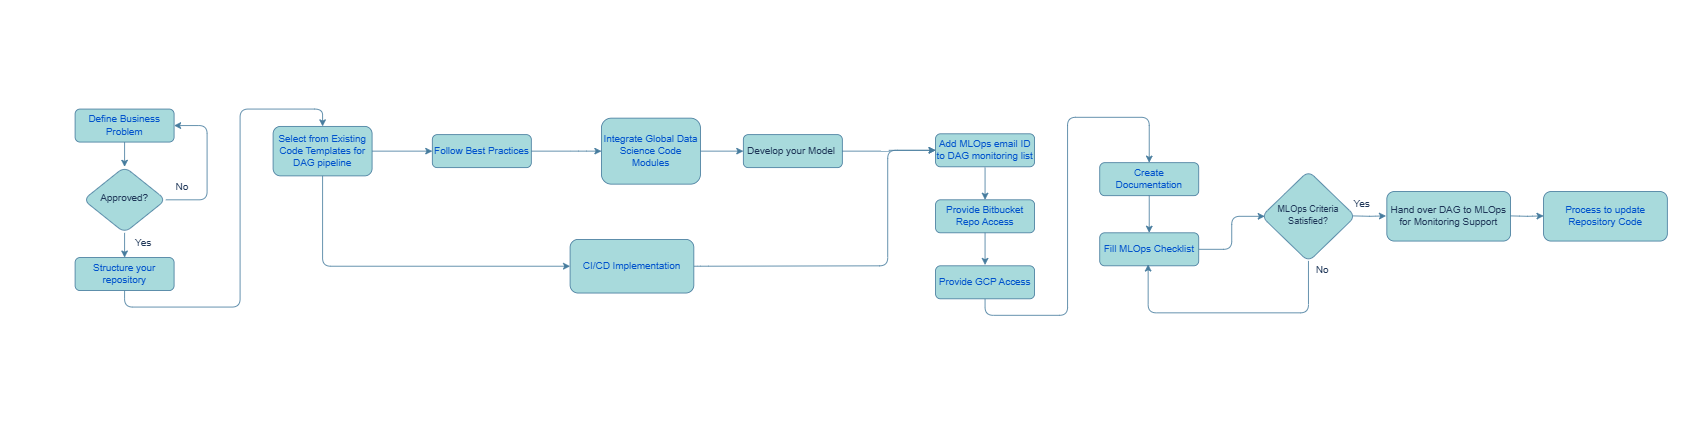

## Model Deployment Idea with Google Cloud


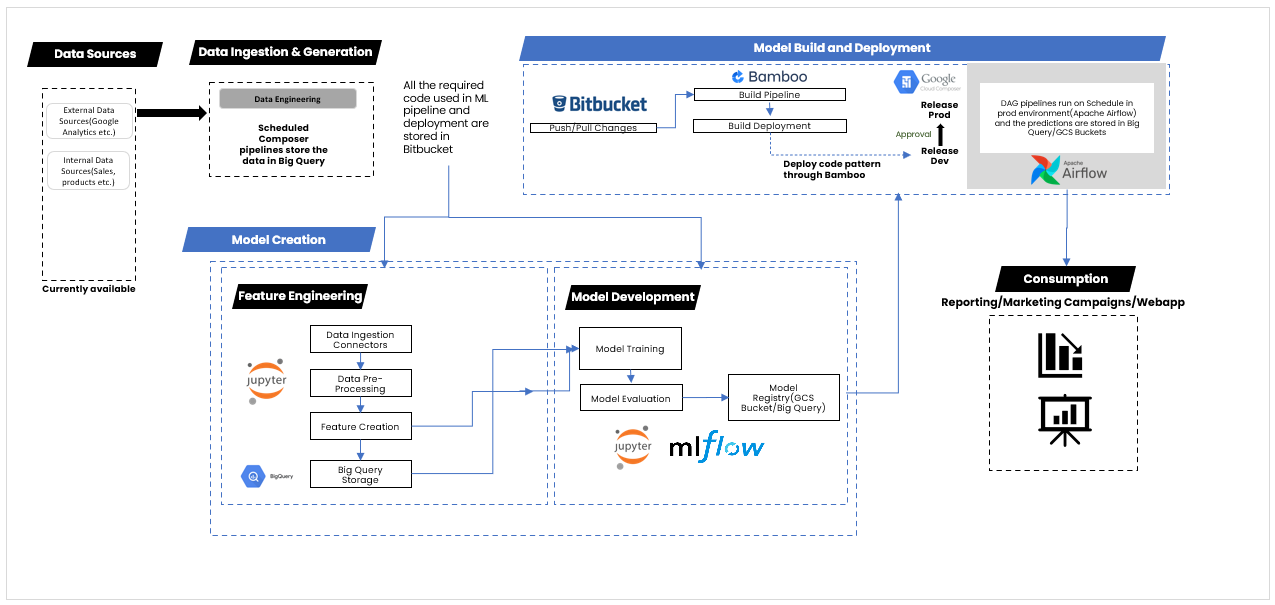



1. How do you perform canary build?
We can build and use stagging using CICD tool for  for performing model build in canary deployment strategy.


2. What should be the strategy for ML Model Monitoring?
For monitoring we can use MLFlow, GCS Cloud Logging and monitoring tool. If its a AWS or Azure then we can use and intigrate respective cloud tools like Azure ML, AWS sagemaker, Databricks MLFlow, scikit learn monitoring API's.

3. How do you perform load and stress testing?

I would start with identifying the key metrics that you want to measure during load and stress testing.Generating test data that represents the real-world distribution of inputs that the model is expected to encounter, such as a BQ slots used, instance size required, storage capacity.
Next step would be setting up a closely resembling environment to production, where the model will be deployed.
then designing the test case scenario like varying parameters such as the number of concurrent requests, request rate, and input data size.

Finally would be excecute analyze and repeat until we reach to the optimization expected.


4. How do you track, monitor and audit ML training?

In Model tracking, we require a model repository which can keep the track of model versions. It can be AWS ECR, sagemaker, Azure ML or GCS bucket.

For monitoring and experiment tracking tools like MLFlow, Tensorboard can be used.This involves tracking metrics such as accuracy, precision, recall, F1-score, or any other relevant metric depending on the problem domain.

While training process, Data drift, outliers proportions can be tracked, this would be business usecase specific.

For auditing, Wiki and Miro board, draw.io can be helpful,Documentation ensures transparency, reproducibility, and compliance with regulatory requirements.








##Thank you